### Using linear regression model to predict the house price

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt 
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

In [59]:
df1 = pd.read_csv('house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [60]:
df1.shape

(13320, 9)

In [61]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [62]:
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [63]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [64]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [65]:
df3.shape

(13246, 5)

In [66]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [67]:
df3['bedroom'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))

C:\Users\Michelle\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
df3.head()

,location,size,total_sqft,bath,price,bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [69]:
df3['bedroom'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [70]:
df3[df3.bedroom > 20]

,location,size,total_sqft,bath,price,bedroom
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [71]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [72]:
df3.bedroom.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [73]:
def is_float(x):
    try: float(x)
    except: return False
    return True

In [74]:
df3[~df3.total_sqft.apply(is_float)].head(6)

,location,size,total_sqft,bath,price,bedroom
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1


In [75]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try: return float(x)
    except: return None

In [76]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [77]:
convert_sqft_to_num('2166')

2166.0

In [78]:
convert_sqft_to_num('1100Sq. Yards')

In [79]:
df3['sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)

C:\Users\Michelle\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
df3.head()

,location,size,total_sqft,bath,price,bedroom,sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0


In [81]:
df3.loc[1019]

location      Marathi Layout
size               1 Bedroom
total_sqft         5.31Acres
bath                       1
price                    110
bedroom                    1
sqft                     NaN
Name: 1019, dtype: object

In [82]:
df4 = df3.drop(['size', 'total_sqft'], axis = 'columns')
df4.head()

,location,bath,price,bedroom,sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0
1,Chikka Tirupathi,5.0,120.00,4,2600.0
2,Uttarahalli,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3.0,95.00,3,1521.0
4,Kothanur,2.0,51.00,2,1200.0


In [83]:
df4.price.min()

8.0

In [84]:
df4.price = df4.price * 1000

In [85]:
df4.head()

,location,bath,price,bedroom,sqft
0,Electronic City Phase II,2.0,39070.0,2,1056.0
1,Chikka Tirupathi,5.0,120000.0,4,2600.0
2,Uttarahalli,2.0,62000.0,3,1440.0
3,Lingadheeranahalli,3.0,95000.0,3,1521.0
4,Kothanur,2.0,51000.0,2,1200.0


In [86]:
df4.price = df4.price.astype(int)

In [87]:
df4.bath = df4.bath.astype(int)

In [88]:
df4.head()

,location,bath,price,bedroom,sqft
0,Electronic City Phase II,2,39070,2,1056.0
1,Chikka Tirupathi,5,120000,4,2600.0
2,Uttarahalli,2,62000,3,1440.0
3,Lingadheeranahalli,3,95000,3,1521.0
4,Kothanur,2,51000,2,1200.0


In [89]:
df4['price_per_sqft'] = df4['price'] / df4['sqft']

In [90]:
df4.head()

,location,bath,price,bedroom,sqft,price_per_sqft
0,Electronic City Phase II,2,39070,2,1056.0,36.998106
1,Chikka Tirupathi,5,120000,4,2600.0,46.153846
2,Uttarahalli,2,62000,3,1440.0,43.055556
3,Lingadheeranahalli,3,95000,3,1521.0,62.458909
4,Kothanur,2,51000,2,1200.0,42.500000


In [91]:
df4['total_price_usd'] = df4['price']

In [92]:
df4.head()

,location,bath,price,bedroom,sqft,price_per_sqft,total_price_usd
0,Electronic City Phase II,2,39070,2,1056.0,36.998106,39070
1,Chikka Tirupathi,5,120000,4,2600.0,46.153846,120000
2,Uttarahalli,2,62000,3,1440.0,43.055556,62000
3,Lingadheeranahalli,3,95000,3,1521.0,62.458909,95000
4,Kothanur,2,51000,2,1200.0,42.500000,51000


In [93]:
df5 = df4.drop(['price'], axis = 'columns')

In [94]:
df5.head()

,location,bath,bedroom,sqft,price_per_sqft,total_price_usd
0,Electronic City Phase II,2,2,1056.0,36.998106,39070
1,Chikka Tirupathi,5,4,2600.0,46.153846,120000
2,Uttarahalli,2,3,1440.0,43.055556,62000
3,Lingadheeranahalli,3,3,1521.0,62.458909,95000
4,Kothanur,2,2,1200.0,42.500000,51000


In [95]:
len(df5.location.unique())

1304

In [96]:
df5.location = df5.location.apply(lambda x : x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats.head()

location
Whitefield         535
Sarjapur  Road     392
Electronic City    304
Kanakpura Road     266
Thanisandra        236
Name: location, dtype: int64

In [97]:
len(location_stats[location_stats <= 10]) 

1052

In [98]:
location_stats_less = location_stats[location_stats <= 10]
location_stats_less 

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [99]:
len(df5.location.unique())

1293

In [100]:
df5.location = df5.location.apply(lambda x : 'other' if x in location_stats_less else x)
len(df5.location.unique())

242

In [101]:
df5.head(10)

,location,bath,bedroom,sqft,price_per_sqft,total_price_usd
0,Electronic City Phase II,2,2,1056.0,36.998106,39070
1,Chikka Tirupathi,5,4,2600.0,46.153846,120000
2,Uttarahalli,2,3,1440.0,43.055556,62000
3,Lingadheeranahalli,3,3,1521.0,62.458909,95000
4,Kothanur,2,2,1200.0,42.500000,51000
5,Whitefield,2,2,1170.0,32.478632,38000
6,Old Airport Road,4,4,2732.0,74.670571,204000
7,Rajaji Nagar,4,4,3300.0,181.818182,600000
8,Marathahalli,3,3,1310.0,48.282443,63250
9,other,6,6,1020.0,362.745098,370000


In [102]:
len(df5[df5.sqft / df5.bedroom < 300])

744

In [103]:
df5[df5.sqft / df5.bedroom < 300].head()

,location,bath,bedroom,sqft,price_per_sqft,total_price_usd
9,other,6,6,1020.0,362.745098,370000
45,HSR Layout,9,8,600.0,333.333333,200000
58,Murugeshpalya,4,6,1407.0,106.609808,150000
68,Devarachikkanahalli,7,8,1350.0,62.962963,85000
70,other,3,3,500.0,200.000000,100000


In [104]:
df5.shape

(13246, 6)

In [105]:
df6 = df5[~ (df5.sqft / df5.bedroom < 300)]
df6.shape

(12502, 6)

In [106]:
df6.price_per_sqft.describe()

count    12456.000000
mean        63.085028
std         41.681274
min          2.678298
25%         42.105263
50%         52.941176
75%         69.166667
max       1764.705882
Name: price_per_sqft, dtype: float64

In [107]:
df6[df6.price_per_sqft < 100].head()

,location,bath,bedroom,sqft,price_per_sqft,total_price_usd
0,Electronic City Phase II,2,2,1056.0,36.998106,39070
1,Chikka Tirupathi,5,4,2600.0,46.153846,120000
2,Uttarahalli,2,3,1440.0,43.055556,62000
3,Lingadheeranahalli,3,3,1521.0,62.458909,95000
4,Kothanur,2,2,1200.0,42.500000,51000


In [108]:
len(df6[df6.price_per_sqft < 100])

11181

In [109]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [110]:
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 6)

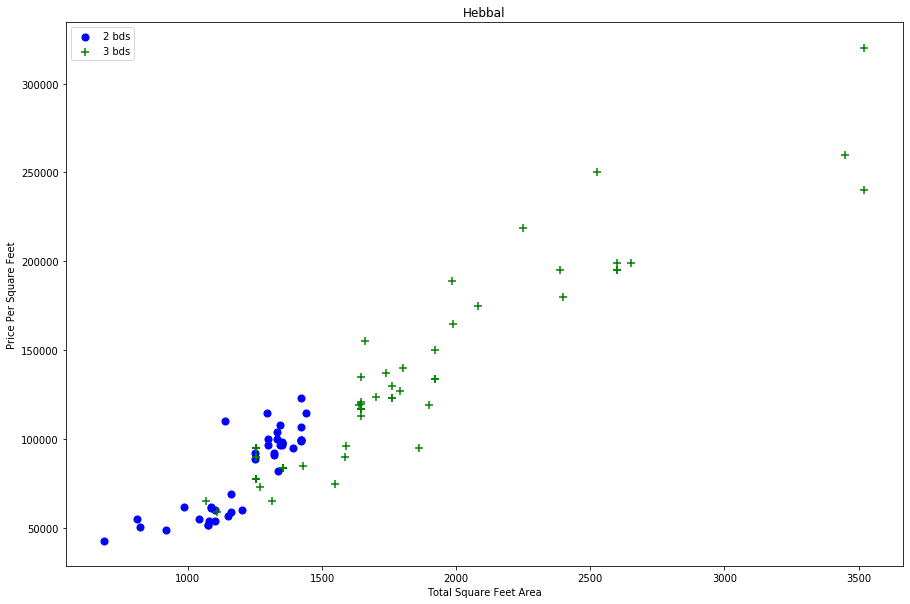

In [111]:
def plot_scatter_chart(df, location):
    bds2 = df[(df.location == location) & (df.bedroom == 2)] 
    bds3 = df[(df.location == location) & (df.bedroom == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bds2.sqft, bds2.total_price_usd, color='blue', label='2 bds', s=50)
    plt.scatter(bds3.sqft, bds3.total_price_usd, color='green', label='3 bds', s=50, marker='+')
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7, "Hebbal")

We should remove properties where at the same location with more bedrooms and bigger sqft, but price is lower.
Solution: for a given location, build a dictionary of stats per bedroom. For example,

{
    '1': {
        'mean': 4000,
        'std': 2000,
        'count': 34
    },
    '2': {
        'mean': 4300,
        'std': 2300,
        'count': 22
    },
}

Now we can remove those 2bds whose price_per_sqft is less than mean price_per_sqft of 1bds. 

In [112]:
def remove_bds_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bds_stats = {}
        for bds, bds_df in location_df.groupby('bedroom'):
            bds_stats[bds] = {
                'mean': np.mean(bds_df.price_per_sqft),
                'std': np.std(bds_df.price_per_sqft),
                'count': bds_df.shape[0]
            }
        for bds, bds_df in location_df.groupby('bedroom'):
            stats = bds_stats.get(bds - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bds_df[bds_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

df8 = remove_bds_outliers(df7)
df8.shape

(7329, 6)

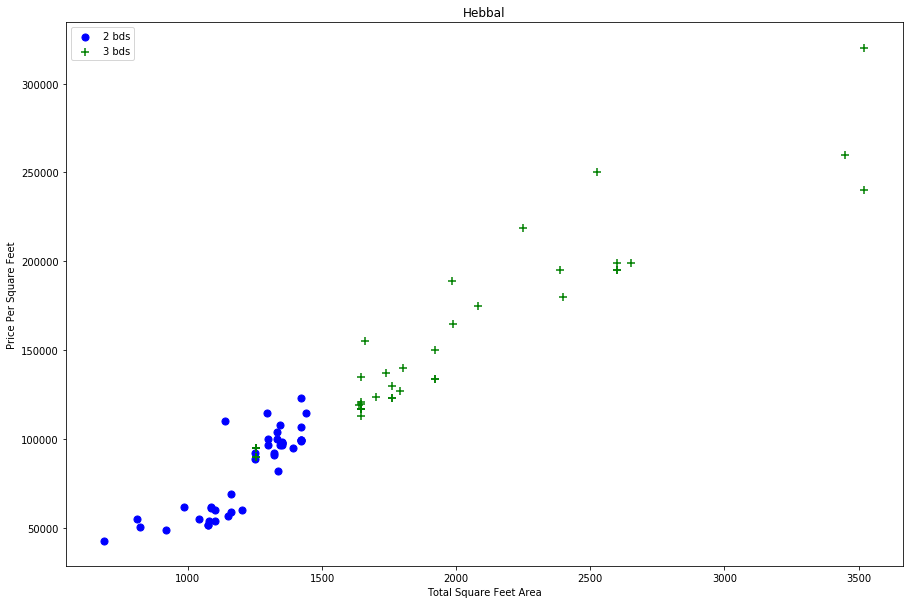

In [113]:
plot_scatter_chart(df8, "Hebbal")

Text(0, 0.5, 'Count')

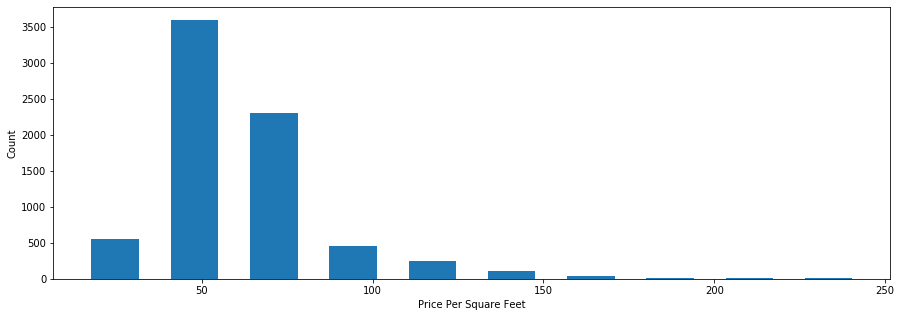

In [114]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (15,5)
plt.hist(df8.price_per_sqft, rwidth = 0.6)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [115]:
df8.bath.unique()

array([ 4,  3,  2,  5,  8,  1,  6,  7,  9, 12, 16, 13])

In [116]:
df8[df8.bath > 10]

,location,bath,bedroom,sqft,price_per_sqft,total_price_usd
5277,Neeladri Nagar,12,10,4000.0,40.000000,160000
8486,other,12,10,12000.0,43.750000,525000
8575,other,16,16,10000.0,55.000000,550000
9308,other,12,11,6000.0,25.000000,150000
9639,other,13,13,5425.0,50.691244,275000


Text(0, 0.5, 'Count')

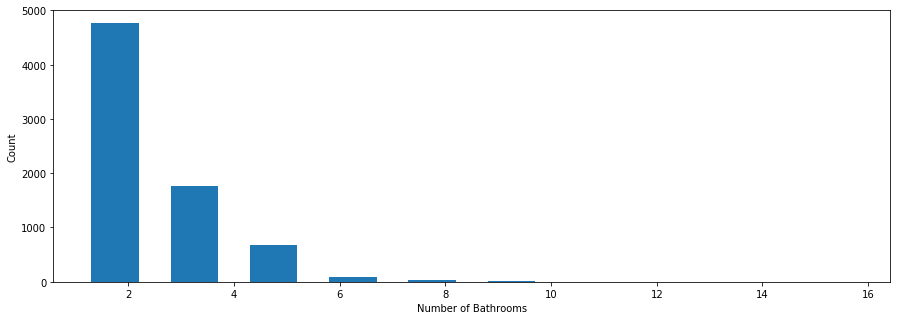

In [117]:
plt.hist(df8.bath, rwidth = 0.6)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [118]:
df8[df8.bath > df8.bedroom + 2]

,location,bath,bedroom,sqft,price_per_sqft,total_price_usd
1626,Chikkabanavar,7,4,2460.0,32.520325,80000
5238,Nagasandra,8,4,7000.0,64.285714,450000
6711,Thanisandra,6,3,1806.0,64.230343,116000
8411,other,9,6,11338.0,88.198977,1000000


In [119]:
df8[df8.bath > df8.bedroom + 1]

,location,bath,bedroom,sqft,price_per_sqft,total_price_usd
36,2nd Stage Nagarbhavi,8,6,3000.0,150.333333,451000
37,2nd Stage Nagarbhavi,8,6,2400.0,187.500000,450000
530,Arekere,6,4,2710.0,52.398524,142000
580,BTM 2nd Stage,5,3,1260.0,146.825397,185000
813,Bannerghatta,6,4,3012.0,83.001328,250000
...,...,...,...,...,...,...
9915,other,6,4,6652.0,76.668671,510000
10036,other,4,2,600.0,116.666667,70000
10089,other,5,3,5656.0,88.224894,499000
10202,other,6,4,6652.0,99.218280,660000


In [120]:
df8.shape

(7329, 6)

In [121]:
df9 = df8[df8.bath < df8.bedroom + 1]
df9.shape

(6871, 6)

In [122]:
df9.head(1)

,location,bath,bedroom,sqft,price_per_sqft,total_price_usd
0,1st Block Jayanagar,4,4,2850.0,150.175439,428000


In [123]:
df10 = df9.drop(['price_per_sqft'], axis = 'columns')
df10['price'] = df9['total_price_usd']
df10.head(1)

,location,bath,bedroom,sqft,total_price_usd,price
0,1st Block Jayanagar,4,4,2850.0,428000,428000


In [124]:
df10 = df10.drop(['total_price_usd'], axis = 'columns')
df10.head(10)

,location,bath,bedroom,sqft,price
0,1st Block Jayanagar,4,4,2850.0,428000
1,1st Block Jayanagar,3,3,1630.0,194000
2,1st Block Jayanagar,2,3,1875.0,235000
3,1st Block Jayanagar,2,3,1200.0,130000
4,1st Block Jayanagar,2,2,1235.0,148000
5,1st Block Jayanagar,4,4,2750.0,413000
6,1st Block Jayanagar,4,4,2450.0,368000
8,1st Phase JP Nagar,3,3,1875.0,167000
9,1st Phase JP Nagar,5,5,1500.0,85000
12,1st Phase JP Nagar,3,3,2059.0,225000


In [125]:
dummies = pd.get_dummies(df10.location)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
df11 = pd.concat([df10, dummies.drop('other', axis = 'columns')], axis = 'columns')
df11.head(10)

,location,bath,bedroom,sqft,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4,4,2850.0,428000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3,3,1630.0,194000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,2,3,1875.0,235000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,2,3,1200.0,130000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2,2,1235.0,148000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,4,4,2750.0,413000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,4,4,2450.0,368000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,3,3,1875.0,167000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Phase JP Nagar,5,5,1500.0,85000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1st Phase JP Nagar,3,3,2059.0,225000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
df12 = df11.drop('location', axis = 'columns')
df12.head(2)

,bath,bedroom,sqft,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,4,2850.0,428000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,3,1630.0,194000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
df12.shape

(6871, 245)

In [129]:
X = df12.drop('price', axis = 'columns')
X.head(2)

,bath,bedroom,sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,4,2850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,3,1630.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
y = df12.price
y.head()

0    428000
1    194000
2    235000
3    130000
4    148000
Name: price, dtype: int32

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10) 

In [132]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.7879992915812645

In [133]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.88090238, 0.83213843, 0.83709318, 0.8394431 , 0.85996262])

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha':[1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    CV = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.849908,{'normalize': False}
1,lasso,0.849966,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.705148,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [135]:
X.columns

Index(['bath', 'bedroom', 'sqft', '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [136]:
np.where(X.columns == '2nd Phase Judicial Layout')[0][0]

5

In [137]:
def predict_price(location, bath, bedroom, sqft):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = bath
    x[1] = bedroom
    x[2] = sqft
    if loc_index >= 0:
        x[loc_index] = 1
    
    return int(lr_clf.predict([x])[0])

In [138]:
predict_price('1st Phase JP Nagar', 2, 2, 1000)

93662

In [139]:
predict_price('1st Phase JP Nagar', 2, 3, 1000)

96380

In [140]:
predict_price('Indira Nagar', 2, 2, 1000)

198963

In [141]:
predict_price('Indira Nagar', 3, 3, 1000)

200908